Continuous Data and the Gaussian Distribution
=======

### Preliminaries

- Goal 
  - Review of information processing with Gaussian distributions in linear systems
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 85-93       
    - [MacKay - 2006 - The Humble Gaussian Distribution](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Mackay-2006-The-humble-Gaussian-distribution.pdf) (highly recommended!)
    - [Ariel Caticha - 2012 - Entropic Inference and the Foundations of Physics](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics.pdf), pp.30-34, section 2.8, the Gaussian distribution
  - References
    - [E.T. Jaynes - 2003 - Probability Theory, The Logic of Science](http://www.med.mcgill.ca/epidemiology/hanley/bios601/GaussianModel/JaynesProbabilityTheory.pdf) (best book available on the Bayesian view on probability theory)


### Example Problem

<span class="exercise">
Consider a set of observations $D=\{x_1,…,x_N\}$ in the 2-dimensional plane (see Figure). All observations were generated by the same process. We now draw an extra observation $x_\bullet = (a,b)$ from the same data generating process. What is the probability that $x_\bullet$ lies within the shaded rectangle $S$?
</span>



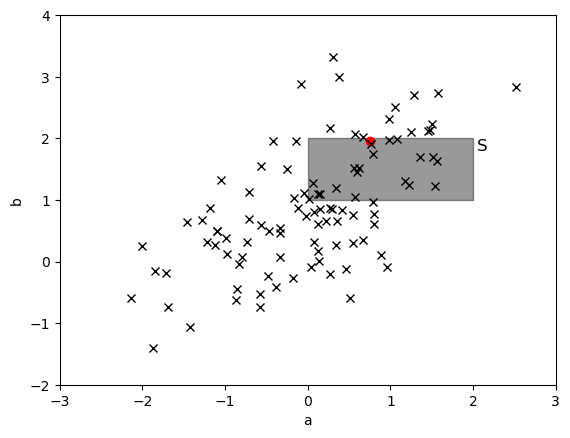

In [1]:
using Distributions, PyPlot
N = 100
generative_dist = MvNormal([0,1.], [0.8 0.5; 0.5 1.0])
function plotObservations(obs::Matrix)
    plot(obs[1,:], obs[2,:], "kx", zorder=3)
    fill_between([0., 2.], 1., 2., color="k", alpha=0.4, zorder=2) # Shaded area
    text(2.05, 1.8, "S", fontsize=12)
    xlim([-3,3]); ylim([-2,4]); xlabel("a"); ylabel("b")
end
D = rand(generative_dist, N) # Generate observations from generative_dist
plotObservations(D)
x_dot = rand(generative_dist) # Generate x∙
plot(x_dot[1], x_dot[2], "ro");

### The Gaussian Distribution 

- Consider a random (vector) variable $x \in \mathbb{R}^M$ that is "normally" (i.e., Gaussian) distributed. The _moment_ parameterization of the Gaussian distribution is completely specified by its _mean_ $\mu$ and _variance_ $\Sigma$ and given by
$$
p(x | \mu, \Sigma) = \mathcal{N}(x|\mu,\Sigma) \triangleq \frac{1}{\sqrt{(2\pi)^M |\Sigma|}} \,\exp\left\{-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) \right\}\,.
$$
where $|\Sigma| \triangleq \mathrm{det}(\Sigma)$ is the determinant of $\Sigma$.

- Alternatively, the <a id="natural-parameterization">_canonical_ (a.k.a. _natural_  or _information_ ) parameterization</a> of the Gaussian distribution is given by
$$\begin{equation*}
p(x | \eta, \Lambda) = \mathcal{N}_c(x|\eta,\Lambda)  = \exp\left\{ a + \eta^T x - \frac{1}{2}x^T \Lambda x \right\}\,.
\end{equation*}$$
  - $a = -\frac{1}{2} \left( M \log(2 \pi) - \log |\Lambda| + \eta^T \Lambda \eta\right)$ is the normalizing constant that ensures that $\int p(x)\mathrm{d}x = 1$.
  - $\Lambda = \Sigma^{-1}$ is called the *precision matrix*.
  - $\eta = \Sigma^{-1} \mu$ is the _natural_ mean or for clarity often called the *precision-weighted* mean.

### Why the Gaussian?

- Why is the Gaussian distribution so ubiquitously used in science and engineering? (see [Jaynes, section 7.1.4](http://www.med.mcgill.ca/epidemiology/hanley/bios601/GaussianModel/JaynesProbabilityTheory.pdf#page=250)).

- (1) Operations on probability distributions tend to lead to Gaussian distributions:
  - Any smooth function with single rounded maximum, if raised to higher and higher powers, goes into a Gaussian function. (Example: sequential Bayesian inference).
  - The [Gaussian distribution has higher entropy](https://en.wikipedia.org/wiki/Differential_entropy#Maximization_in_the_normal_distribution) than any other with the same variance. 
    - Therefore any operation on a probability distribution that discards information but preserves variance gets us closer to a Gaussian. 
    - As an example, see [Jaynes, section 7.1.4](http://www.med.mcgill.ca/epidemiology/hanley/bios601/GaussianModel/JaynesProbabilityTheory.pdf#page=250) for how this leads to the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), which results from performing convolution operations on distributions.


- (2) Once the Gaussian has been attained, this form tends to be preserved. e.g.,   
  - The convolution of two Gaussian functions is another Gaussian function (useful in sum of 2 variables and linear transformations)
  - The product of two Gaussian functions is another Gaussian function (useful in Bayes rule).
  - The Fourier transform of a Gaussian function is another Gaussian function.

###  Transformations and Sums of Gaussian Variables

- A **linear transformation** $z=Ax+b$ of a Gaussian variable $\mathcal{N}(x|\mu_x,\Sigma_x)$ is Gaussian distributed as
$$
p(z) = \mathcal{N} \left(z \,|\, A\mu_x+b, A\Sigma_x A^T \right) \tag{SRG-4a}
$$ 
  - In fact, after a linear transformation $z=Ax+b$, no matter how $x$ is distributed, the mean and variance of $z$ are always given by $\mu_z = A\mu_x + b$  and $\Sigma_z = A\Sigma_x A^T$, respectively (see   [probability theory review lesson](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Probability-Theory-Review.ipynb#linear-transformation)). In case $x$ is not Gaussian, higher order moments may be needed to specify the distribution for $z$. 

- The **sum of two independent Gaussian variables** is also Gaussian distributed. Specifically, if $x \sim \mathcal{N} \left(\mu_x, \Sigma_x \right)$ and $y \sim \mathcal{N} \left(\mu_y, \Sigma_y \right)$, then the PDF for $z=x+y$ is given by
$$\begin{align}
p(z) &= \mathcal{N}(x\,|\,\mu_x,\Sigma_x) \ast \mathcal{N}(y\,|\,\mu_y,\Sigma_y) \notag\\
  &= \mathcal{N} \left(z\,|\,\mu_x+\mu_y, \Sigma_x +\Sigma_y \right) \tag{SRG-8}
\end{align}$$
 
  - The sum of two Gaussian _distributions_ is NOT a Gaussian distribution. Why not?

### Example: Gaussian Signals in a Linear System

<p style="text-align:center;"><img src="./figures/fig-linear-system.png" width="400px"></p>

- Given independent variables
$x \sim \mathcal{N}(\mu_x,\sigma_x^2)$ and $y \sim \mathcal{N}(\mu_y,\sigma_y^2)$, what is the PDF for $z = A\cdot(x -y) + b$ ? (see [Exercises](http://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/exercises/Exercises-The-Gaussian-Distribution.ipynb))

- Think about the role of the Gaussian distribution for stochastic linear systems in relation to what sinusoidals mean for deterministic linear system analysis.

### Bayesian Inference for the Gaussian


- Let's estimate a constant $\theta$ from one 'noisy' measurement $x$ about that constant. 

- We assume the following measurement equations (the tilde $\sim$ means: 'is distributed as'):
$$\begin{align*}
x &= \theta + \epsilon \\
\epsilon &\sim \mathcal{N}(0,\sigma^2)
\end{align*}$$

- Also, let's assume a Gaussian prior for $\theta$
$$\begin{align*}
\theta &\sim \mathcal{N}(\mu_0,\sigma_0^2) \\
\end{align*}$$


##### Model specification
 
- Note that you can rewrite these specifications in probabilistic notation as follows:

$$\begin{align}
    p(x|\theta) &=  \mathcal{N}(x|\theta,\sigma^2) \tag{likelihood}\\
    p(\theta) &=\mathcal{N}(\theta|\mu_0,\sigma_0^2) \tag{prior}
\end{align}$$

- (**Notational convention**). Note that we write $\epsilon \sim \mathcal{N}(0,\sigma^2)$ but not $\epsilon \sim \mathcal{N}(\epsilon | 0,\sigma^2)$, and we write  $p(\theta) =\mathcal{N}(\theta|\mu_0,\sigma_0^2)$ but not $p(\theta) =\mathcal{N}(\mu_0,\sigma_0^2)$. 

##### Inference

- For simplicity, we assume that the variance $\sigma^2$ is given and will proceed to derive a Bayesian posterior for the mean $\theta$. The case for Bayesian inference for $\sigma^2$ with a given mean is [discussed in the optional slides](#inference-for-precision).

- Let's do Bayes rule for the posterior PDF $p(\theta|x)$. 
$$\begin{align*}
p(\theta|x)  &= \frac{p(x|\theta) p(\theta)}{p(x)} \propto p(x|\theta) p(\theta) \notag \\
    &= \mathcal{N}(x|\theta,\sigma^2) \mathcal{N}(\theta|\mu_0,\sigma_0^2)   \notag \\
    &\propto \exp \left\{   -\frac{(x-\theta)^2}{2\sigma^2} - \frac{(\theta-\mu_0)^2}{2\sigma_0^2} \right\} \notag \\
    &\propto \exp \left\{ \theta^2 \cdot \left( -\frac{1}{2 \sigma_0^2} - \frac{1}{2\sigma^2}  \right)  + \theta \cdot  \left( \frac{\mu_0}{\sigma_0^2} + \frac{x}{\sigma^2}\right)   \right\} \notag \\
    &= \exp\left\{ -\frac{\sigma_0^2 + \sigma^2}{2 \sigma_0^2 \sigma^2} \left( \theta - \frac{\sigma_0^2 x +  \sigma^2 \mu_0}{\sigma^2 + \sigma_0^2}\right)^2  \right\} 
\end{align*}$$
which we recognize as a Gaussian distribution w.r.t. $\theta$. 

- (Just as an aside,) this computational 'trick' for multiplying two Gaussians is called **completing the square**. The procedure makes use of the equality $$ax^2+bx+c_1 = a\left(x+\frac{b}{2a}\right)^2+c_2$$

  
- In particular, it follows that the posterior for $\theta$ is
$$\begin{equation*}
    p(\theta|x) = \mathcal{N} (\theta |\, \mu_1, \sigma_1^2)
\end{equation*}$$
where
$$\begin{align*}
  \frac{1}{\sigma_1^2}  &= \frac{\sigma_0^2 + \sigma^2}{\sigma^2 \sigma_0^2} = \frac{1}{\sigma_0^2} + \frac{1}{\sigma^2}  \\
  \mu_1   &= \frac{\sigma_0^2 x +  \sigma^2 \mu_0}{\sigma^2 + \sigma_0^2} = \sigma_1^2 \, \left(  \frac{1}{\sigma_0^2} \mu_0 + \frac{1}{\sigma^2} x \right) 
\end{align*}$$

### (Multivariate) Gaussian Multiplication

- So, multiplication of two Gaussian distributions yields another (unnormalized) Gaussian with
  - posterior precision equals **sum of prior precisions**
  - posterior precision-weighted mean equals **sum of prior precision-weighted means**

- As we just saw, great application to Bayesian inference!

$$\begin{equation*}
\underbrace{\text{Gaussian}}_{\text{posterior}}
 \propto \underbrace{\text{Gaussian}}_{\text{likelihood}} \times \underbrace{\text{Gaussian}}_{\text{prior}}
\end{equation*}$$

- <a id="Gaussian-multiplication"></a>In general, the multiplication of two multi-variate Gaussians yields an (unnormalized) Gaussian:
$$\begin{equation*}
\boxed{\mathcal{N}(x|\mu_a,\Sigma_a) \cdot \mathcal{N}(x|\mu_b,\Sigma_b) = \underbrace{\mathcal{N}(\mu_a|\, \mu_b, \Sigma_a + \Sigma_b)}_{\text{normalization constant}} \cdot \mathcal{N}(x|\mu_c,\Sigma_c)} \tag{SRG-6}
\end{equation*}$$
where
$$\begin{align*}
\Sigma_c^{-1} &= \Sigma_a^{-1} + \Sigma_b^{-1} \\
\Sigma_c^{-1} \mu_c &= \Sigma_a^{-1}\mu_a + \Sigma_b^{-1}\mu_b
\end{align*}$$

- $\Rightarrow$ Note that Bayesian inference is trivial in the [_canonical_ parameterization of the Gaussian](#natural-parameterization), where we would get
$$\begin{align*}
 \Lambda_c &= \Lambda_a + \Lambda_b  \quad &&\text{(precisions add)}\\
 \eta_c &= \eta_a + \eta_b \quad &&\text{(precision-weighted means add)}
\end{align*}$$

### Code Example: Product of Two Gaussian PDFs

- Let's plot the exact product of two Gaussian PDFs as well as the normalized product according to the above derivation.

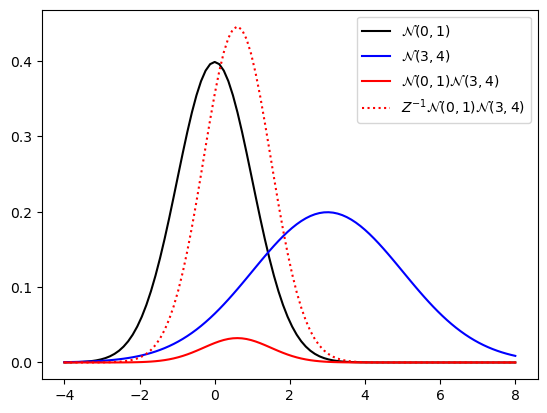

In [2]:
using PyPlot, Distributions
d1 = Normal(0, 1) # μ=0, σ^2=1
d2 = Normal(3, 2) # μ=3, σ^2=4

# Calculate the parameters of the product d1*d2
s2_prod = (d1.σ^-2 + d2.σ^-2)^-1
m_prod = s2_prod * ((d1.σ^-2)*d1.μ + (d2.σ^-2)*d2.μ)
d_prod = Normal(m_prod, sqrt(s2_prod)) # Note that we neglect the normalization constant.

# Plot stuff
x = range(-4, stop=8, length=100)
plot(x, pdf.(d1,x), "k")
plot(x, pdf.(d2,x), "b")
plot(x, pdf.(d1,x) .* pdf.(d2,x), "r-") # Plot the exact product
plot(x, pdf.(d_prod,x), "r:")          # Plot the normalized Gaussian product
legend([L"\mathcal{N}(0,1)", 
        L"\mathcal{N}(3,4)", 
        L"\mathcal{N}(0,1) \mathcal{N}(3,4)", 
        L"Z^{-1} \mathcal{N}(0,1) \mathcal{N}(3,4)"]);

The solid and dotted red curves are identical up to a scaling factor $Z$.


### Bayesian Inference with multiple Observations

- Now consider that we measure a data set $D = \{x_1, x_2, \ldots, x_N\}$, with measurements
  $$\begin{align*}
x_n &= \theta + \epsilon_n \\
\epsilon_n &\sim \mathcal{N}(0,\sigma^2)
\end{align*}$$
and the same prior for $\theta$:
$$\begin{align*}
\theta &\sim \mathcal{N}(\mu_0,\sigma_0^2) \\
\end{align*}$$

- Let's derive a distribution for the next sample $x_{N+1}$. 

##### inference 

- Clearly, the posterior for $\theta$ is now 
$$\begin{align*}
p(\theta|D) \propto  \underbrace{\mathcal{N}(\theta|\mu_0,\sigma_0^2)}_{\text{prior}} \cdot \underbrace{\prod_{n=1}^N \mathcal{N}(x_n|\theta,\sigma^2)}_{\text{likelihood}}
\end{align*}$$
which is a multiplication of $N+1$ Gaussians and is therefore also Gaussian distributed.

- Using the property that precisions and precision-weighted means add when Gaussians are multiplied, we can immediately write the posterior $$p(\theta|D) = \mathcal{N} (\theta |\, \mu_N, \sigma_N^2)$$ as 
$$\begin{align*}
  \frac{1}{\sigma_N^2}  &= \frac{1}{\sigma_0^2} + \sum_n  \frac{1}{\sigma^2} \tag{B-2.142}\\
  \mu_N   &= \sigma_N^2 \, \left( \frac{1}{\sigma_0^2} \mu_0 + \sum_n \frac{1}{\sigma^2} x_n  \right) \tag{B-2.141}
\end{align*}$$

##### application: prediction of future sample

- We now have a posterior for the model parameters. Let's write down what we know about the next sample $x_{N+1}$.


$$\begin{align*}
p(x_{N+1}|D_N) &= \int p(x_{N+1}|\theta) p(\theta|D_{N})\mathrm{d}\theta \\
  &= \int \mathcal{N}(x_{N+1}|\theta,\sigma^2) \mathcal{N}(\theta|\mu_N,\sigma^2_N) \mathrm{d}\theta \\
  &= \mathcal{N}(x_{N+1}|\mu_N, \sigma^2_N +\sigma^2 ) \tag{use SRG-6}
\end{align*}$$

- Uncertainty about $x_{N+1}$ comprises both uncertainty about the parameter ($\sigma_N^2$) and observation noise $\sigma^2$.

### Maximum Likelihood Estimation for the Gaussian

- In order to determine the _maximum likelihood_ estimate of $\theta$, we let $\sigma_0^2 \rightarrow \infty$ (leads to uniform prior for $\theta$), yielding $ \frac{1}{\sigma_N^2} = \frac{N}{\sigma^2}$ and consequently
$$\begin{align*}
  \mu_{\text{ML}}  = \left.\mu_N\right\vert_{\sigma_0^2 \rightarrow \infty} = \sigma_N^2 \, \left(   \frac{1}{\sigma^2}\sum_n  x_n  \right) = \frac{1}{N} \sum_{n=1}^N x_n 
  \end{align*}$$
  
  

- As expected, having an expression for the maximum likelihood estimate, it is now possible to rewrite the (Bayesian) posterior mean for $\theta$ as (exercise)
$$\begin{align*}
  \underbrace{\mu_N}_{\text{posterior}}   &= \frac{\sigma^2}{N} \, \left( \frac{1}{\sigma_0^2} \mu_0 + \sum_n \frac{1}{\sigma^2} x_n  \right) \\
  &= \underbrace{\mu_0}_{\text{prior}} + \underbrace{\underbrace{\frac{N \sigma_0^2}{N \sigma_0^2 + \sigma^2}}_{\text{gain}}\cdot \underbrace{\left(\mu_{\text{ML}} - \mu_0 \right)}_{\text{prediction error}}}_{\text{correction}}\tag{B-2.141}
\end{align*}$$

- Hence, the posterior mean always lies somewhere between the prior mean $\mu_0$ and the maximum likelihood estimate (the "data" mean) $\mu_{\text{ML}}$.

### Conditioning and Marginalization of a Gaussian

- Let $z = \begin{bmatrix} x \\ y \end{bmatrix}$ be jointly normal distributed as

$$\begin{align*}
p(z) &= \mathcal{N}(z | \mu, \Sigma) 
  =\mathcal{N} \left( \begin{bmatrix} x \\ y \end{bmatrix} \left| \begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}, 
  \begin{bmatrix} \Sigma_x & \Sigma_{xy} \\ \Sigma_{yx} & \Sigma_y \end{bmatrix} \right. \right)
\end{align*}$$

- Since covariance matrices are by definition symmetric, it follows that $\Sigma_x$ and $\Sigma_y$ are symmetric and $\Sigma_{xy} = \Sigma_{yx}^T$.

- Let's factorize $p(z) = p(x,y)$ into $p(y|x)\cdot p(x)$ through conditioning and marginalization.

$$\begin{equation*}
\text{conditioning: }\boxed{ p(y|x) = \mathcal{N}\left(y\,|\,\mu_y + \Sigma_{yx}\Sigma_x^{-1}(x-\mu_x),\, \Sigma_y - \Sigma_{yx}\Sigma_x^{-1}\Sigma_{xy} \right)}
\end{equation*}$$

$$\begin{equation*}
\text{marginalization: } \boxed{ p(x) = \mathcal{N}\left( x|\mu_x, \Sigma_x \right)}
\end{equation*}$$

- **proof**: in Bishop pp.87-89

- Hence, conditioning and marginalization in Gaussians leads to Gaussians again. This is very useful for applications to Bayesian inference in jointly Gaussian systems.

- With a natural parameterization of the Gaussian $p(z) = \mathcal{N}_c(z|\eta,\Lambda)$ with precision matrix $\Lambda = \Sigma^{-1} = \begin{bmatrix} \Lambda_x & \Lambda_{xy} \\ \Lambda_{yx} & \Lambda_y \end{bmatrix}$,  the conditioning operation results in a simpler result, see Bishop pg.90, eqs. 2.96 and 2.97. 

- As an exercise, interpret the formula for the conditional mean ($\mathbb{E}[y|x]=\mu_y + \Sigma_{yx}\Sigma_x^{-1}(x-\mu_x)$) as a prediction-correction operation.

### Code Example: Joint, Marginal, and Conditional Gaussian Distributions

- Let's plot of the joint, marginal, and conditional distributions.

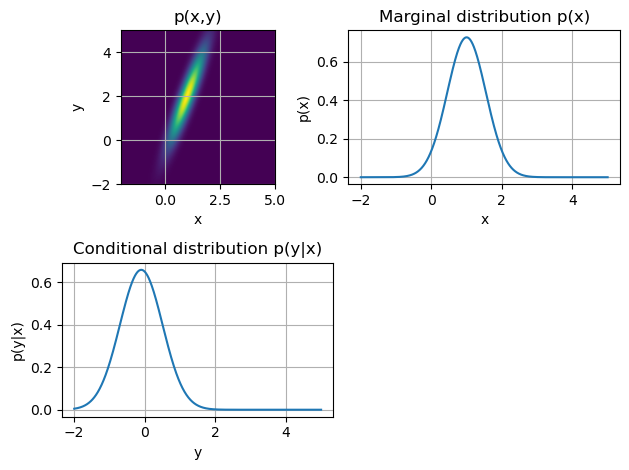

In [3]:
using PyPlot, Distributions

μ = [1.0; 2.0]
Σ = [0.3 0.7;
     0.7 2.0]
joint = MvNormal(μ,Σ)
marginal_x = Normal(μ[1], sqrt(Σ[1,1]))

#Plot p(x,y)
subplot(221)
x_range = y_range = range(-2,stop=5,length=1000)
joint_pdf = [ pdf(joint, [x_range[i];y_range[j]]) for  j=1:length(y_range), i=1:length(x_range)]
imshow(joint_pdf, origin="lower", extent=[x_range[1], x_range[end], y_range[1], y_range[end]])
grid(); xlabel("x"); ylabel("y"); title("p(x,y)"); tight_layout()

# Plot p(x)
subplot(222)
plot(range(-2,stop=5,length=1000), pdf.(marginal_x, range(-2,stop=5,length=1000)))
grid(); xlabel("x"); ylabel("p(x)"); title("Marginal distribution p(x)"); tight_layout()

# Plot p(y|x)
x = 0.1
conditional_y_m = μ[2]+Σ[2,1]*inv(Σ[1,1])*(x-μ[1])
conditional_y_s2 = Σ[2,2] - Σ[2,1]*inv(Σ[1,1])*Σ[1,2]
conditional_y = Normal(conditional_y_m, sqrt.(conditional_y_s2))
subplot(223)
plot(range(-2,stop=5,length=1000), pdf.(conditional_y, range(-2,stop=5,length=1000)))
grid(); xlabel("y"); ylabel("p(y|x)"); title("Conditional distribution p(y|x)"); tight_layout()

As is clear from the plots, the conditional distribution is a renormalized slice from the joint distribution.


### Example: Conditioning of Gaussian

- Consider (again) the system 
$$\begin{align*}
p(x\,|\,\theta) &= \mathcal{N}(x\,|\,\theta,\sigma^2)
\end{align*}$$
with a Gaussian prior for $\theta$:
$$
p(\theta) = \mathcal{N}(\theta\,|\,\mu_0,\sigma_0^2)
$$

- Let $z = \begin{bmatrix} x \\ \theta \end{bmatrix}$. The distribution for $z$ is then given by (Exercise)

$$
p(z) = p\left(\begin{bmatrix} x \\ \theta \end{bmatrix}\right) = \mathcal{N} \left( \begin{bmatrix} x\\ 
  \theta  \end{bmatrix} 
  \,\left|\, \begin{bmatrix} \mu_0\\ 
  \mu_0\end{bmatrix}, 
         \begin{bmatrix} \sigma_0^2+\sigma^2  & \sigma_0^2\\ 
         \sigma_0^2 &\sigma_0^2 
  \end{bmatrix} 
  \right. \right)
$$

- Direct substitution of the rule for Gaussian conditioning leads to the <a id="precision-weighted-update">posterior</a> (derivation as an Exercise):
$$\begin{align*}
p(\theta|x) &= \mathcal{N} \left( \theta\,|\,\mu_1, \sigma_1^2 \right)\,,
\end{align*}$$
with
$$\begin{align*}
K &= \frac{\sigma_0^2}{\sigma_0^2+\sigma^2} \qquad \text{($K$ is called: Kalman gain)}\\
\mu_1 &= \mu_0 + K \cdot (x-\mu_0)\\
\sigma_1^2 &= \left( 1-K \right) \sigma_0^2  
\end{align*}$$
 


- $\Rightarrow$ Moral: For jointly Gaussian systems, we can do inference simply in one step by using the formulas for conditioning and marginalization.

### Recursive Bayesian Estimation

- Consider the signal $x_t=\theta+\epsilon_t$, where $D_t= \left\{x_1,\ldots,x_t\right\}$ is observed _sequentially_ (over time).

- **Problem**: Derive a recursive algorithm for $p(\theta|D_t)$, i.e., an update rule for (posterior) $p(\theta|D_t)$ based on (prior) $p(\theta|D_{t-1})$ and (new observation) $x_t$.
 

##### Model specification 
- Let's define the estimate after $t$ observations (i.e., our _solution_ ) as $p(\theta|D_t) = \mathcal{N}(\theta\,|\,\mu_t,\sigma_t^2)$.

- We define the joint distribution for $\theta$ and $x_t$, given background $D_{t-1}$, by

$$\begin{align*} p(x_t,\theta \,|\, D_{t-1}) &= p(x_t|\theta) \, p(\theta|D_{t-1}) \\
  &= \underbrace{\mathcal{N}(x_t\,|\, \theta,\sigma^2)}_{\text{likelihood}} \, \underbrace{\mathcal{N}(\theta\,|\,\mu_{t-1},\sigma_{t-1}^2)}_{\text{prior}}
\end{align*}$$
 

       
##### Inference

- Use Bayes rule,
$$\begin{align*}
p(\theta|D_t) &= p(\theta|x_t,D_{t-1}) \\
  &\propto p(x_t,\theta | D_{t-1}) \\
  &= p(x_t|\theta) \, p(\theta|D_{t-1}) \\
  &= \mathcal{N}(x_t|\theta,\sigma^2) \, \mathcal{N}(\theta\,|\,\mu_{t-1},\sigma_{t-1}^2) \\
  &= \mathcal{N}(\theta|x_t,\sigma^2) \, \mathcal{N}(\theta\,|\,\mu_{t-1},\sigma_{t-1}^2) \;\;\text{(note this trick)}\\
  &= \mathcal{N}(\theta|\mu_t,\sigma_t^2) \;\;\text{(use Gaussian multiplication formula SRG-6)}
\end{align*}$$
with
$$\begin{align*}
K_t &= \frac{\sigma_{t-1}^2}{\sigma_{t-1}^2+\sigma^2} \qquad \text{(Kalman gain)}\\
\mu_t &= \mu_{t-1} + K_t \cdot (x_t-\mu_{t-1})\\
\sigma_t^2 &= \left( 1-K_t \right) \sigma_{t-1}^2 
\end{align*}$$


- This linear _sequential_ estimator of mean and variance in Gaussian observations is called a **Kalman Filter**.

<!--- - The new observation $x_t$ 'updates' the old estimate $\mu_{t-1}$ by a quantity that is proportional to the _innovation_ (or _residual_)  $\left( x_t - \mu_{t-1} \right)$.
---> 

- Note that the uncertainty about $\theta$ decreases over time (since $0<(1-K_t)<1$). Since we assume that the statistics of the system do not change (stationarity), each new sample provides new information. 

- Recursive Bayesian estimation is the basis for **adaptive signal processing** algorithms such as Least Mean Squares (LMS) and Recursive Least Squares (RLS). 

### Code Example: Kalman Filter

- Let's implement the Kalman filter described above. We'll use it to recursively estimate the value of $\theta$ based on noisy observations.

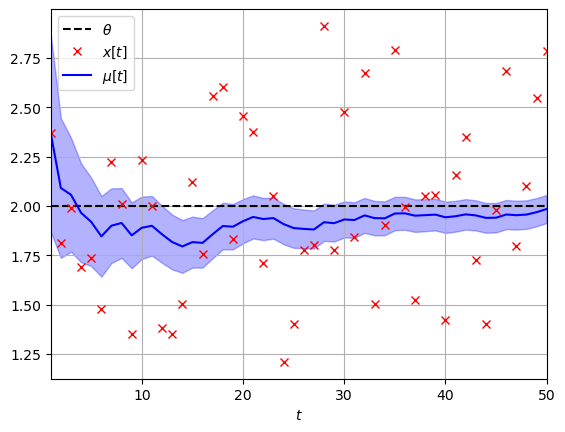

In [4]:
using PyPlot

N = 50                         # Number of observations
θ = 2.0                        # True value of the variable we want to estimate
σ_ϵ2 = 0.25                    # Observation noise variance
x = sqrt(σ_ϵ2) * randn(N) .+ θ # Generate N noisy observations of θ

t = 0
μ = fill!(Vector{Float64}(undef,N), NaN)    # Means of p(θ|D) over time
σ_μ2 = fill!(Vector{Float64}(undef,N), NaN) # Variances of p(θ|D) over time

function performKalmanStep()
    # Perform a Kalman filter step, update t, μ, σ_μ2
    global t += 1
    if t>1 # Use posterior from prev. step as prior
        K = σ_μ2[t-1] / (σ_ϵ2 + σ_μ2[t-1]) # Kalman gain
        μ[t] = μ[t-1] + K*(x[t] - μ[t-1])  # Update mean using (1)
        σ_μ2[t] = σ_μ2[t-1] * (1.0-K)      # Update variance using (2)
    elseif t==1 # Use prior
        # Prior p(θ) = N(0,1000)
        K = 1000.0 / (σ_ϵ2 + 1000.0) # Kalman gain
        μ[t] = 0 + K*(x[t] - 0)      # Update mean using (1)
        σ_μ2[t] = 1000 * (1.0-K)     # Update variance using (2)
    end
end

while t<N
    performKalmanStep()
end

# Plot the 'true' value of θ, noisy observations x, and the recursively updated posterior p(θ|D)
t = collect(1:N)
plot(t, θ*ones(N), "k--")
plot(t, x, "rx")
plot(t, μ, "b-")
fill_between(t, μ-sqrt.(σ_μ2), μ+sqrt.(σ_μ2), color="b", alpha=0.3)
legend([L"\theta", L"x[t]", L"\mu[t]"])
xlim((1, N)); xlabel(L"t"); grid()

The shaded area represents 2 standard deviations of posterior $p(\theta|D)$. The variance of the posterior is guaranteed to decrease monotonically for the standard Kalman filter.


###  <a id="product-of-gaussians">Product of Normally Distributed Variables</a>
- (We've seen that) the sum of two Gausssian distributed variables is also Gaussian distributed.

- Has the _product_ of two Gaussian distributed variables also a Gaussian distribution?

- **No**! In general this is a difficult computation. As an example, let's compute $p(z)$ for $Z=XY$ for the special case that $X\sim \mathcal{N}(0,1)$ and $Y\sim \mathcal{N}(0,1)$.
$$\begin{align*}
p(z) &= \int_{X,Y} p(z|x,y)\,p(x,y)\,\mathrm{d}x\mathrm{d}y \\
  &= \frac{1}{2 \pi}\int  \delta(z-xy) \, e^{-(x^2+y^2)/2} \, \mathrm{d}x\mathrm{d}y \\
  &=  \frac{1}{\pi} \int_0^\infty \frac{1}{x} e^{-(x^2+z^2/x^2)/2} \, \mathrm{d}x \\
  &= \frac{1}{\pi} \mathrm{K}_0( \lvert z\rvert )\,.
\end{align*}$$
where  $\mathrm{K}_n(z)$ is a [modified Bessel function of the second kind](http://mathworld.wolfram.com/ModifiedBesselFunctionoftheSecondKind.html).

### Code Example: Product of Gaussian Distributions

- We plot $p(Z=XY)$ and $p(X)p(Y)$ for $X\sim\mathcal{N}(0,1)$ and $Y \sim \mathcal{N}(0,1)$ to give an idea of how these distributions differ.

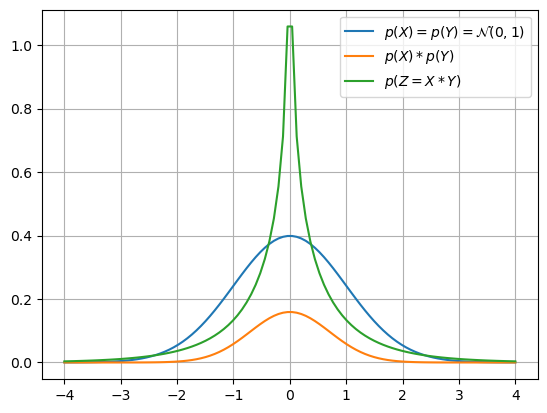

In [5]:
using PyPlot, Distributions, SpecialFunctions
X = Normal(0,1)
Y = Normal(0,1)
pdf_product_std_normals(z::Vector) = (besselk.(0, abs.(z))./π)
range1 = collect(range(-4,stop=4,length=100))
plot(range1, pdf.(X, range1))
plot(range1, pdf.(X,range1).*pdf.(Y,range1))
plot(range1, pdf_product_std_normals(range1))
legend([L"p(X)=p(Y)=\mathcal{N}(0,1)", L"p(X)*p(Y)",L"p(Z=X*Y)"]); grid()

- In short, Gaussian-distributed variables remain Gaussian in linear systems, but this is not the case in non-linear systems. 

### Solution to Example Problem

<span class="exercise">
We apply maximum likelihood estimation to fit a 2-dimensional Gaussian model ($m$) to data set $D$. Next, we evaluate $p(x_\bullet \in S | m)$ by (numerical) integration of the Gaussian pdf over $S$: $p(x_\bullet \in S | m) = \int_S p(x|m) \mathrm{d}x$.</span>

p(x⋅∈S|m) ≈ 0.22075649149327656


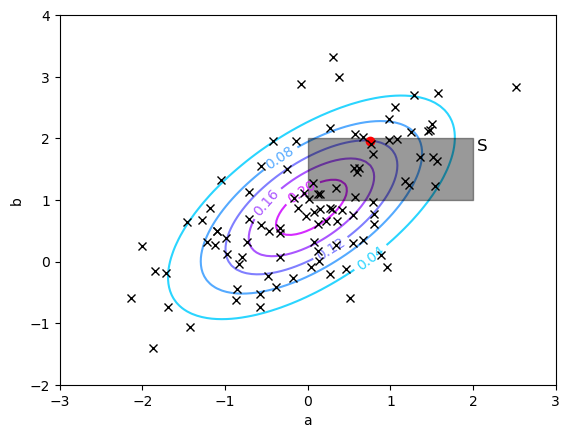

In [6]:
using HCubature, LinearAlgebra# Numerical integration package
# Maximum likelihood estimation of 2D Gaussian
N = length(sum(D,dims=1))
μ = 1/N * sum(D,dims=2)[:,1]
D_min_μ = D - repeat(μ, 1, N)
Σ = Hermitian(1/N * D_min_μ*D_min_μ')
m = MvNormal(μ, convert(Matrix, Σ));

# # Contour plot of estimated Gaussian density
A = Matrix{Float64}(undef,100,100); B = Matrix{Float64}(undef,100,100)
density = Matrix{Float64}(undef,100,100)
for i=1:100
    for j=1:100
        A[i,j] = a = (i-1)*6/100 .- 2
        B[i,j] = b = (j-1)*6/100 .- 3
        density[i,j] = pdf(m, [a,b])
    end
end
c = contour(A, B, density, 6, zorder=1)
PyPlot.set_cmap("cool")
clabel(c, inline=1, fontsize=10)

# Plot observations, x∙, and the countours of the estimated Gausian density
plotObservations(D)
plot(x_dot[1], x_dot[2], "ro")

# Numerical integration of p(x|m) over S:
(val,err) = hcubature((x)->pdf(m,x), [0., 1.], [2., 2.])
println("p(x⋅∈S|m) ≈ $(val)")

### Summary

- A linear transformation of a Gaussian-distributed (potentially multivariate) variable remains Gaussian. 

- Bayesian inference with Gaussian prior and likelihood leads to an analytically computable Gaussian posterior. 

- Here's a nice [summary of Gaussian calculations](https://github.com/bertdv/AIP-5SSB0/raw/master/lessons/notebooks/files/RoweisS-gaussian_formulas.pdf) by Sam Roweis. 


## <center> OPTIONAL SLIDES</center>

### <a id="inference-for-precision">Inference for the Precision Parameter of the Gaussian</a>

- Again, we consider an observed data set $D = \{x_1, x_2, \ldots, x_N\}$ and try to explain these data by a Gaussian distribution.

- We discussed earlier Bayesian inference for the mean with a given variance. Now we will derive a posterior for the variance if the mean is given. (Technically, we will do the derivation for a precision parameter $\lambda = \sigma^{-2}$, since the discussion is a bit more straightforward for the precision parameter).

##### model specification
- The likelihood for the precision parameter is 
$$\begin{align*}
p(D|\lambda) &= \prod_{n=1}^N \mathcal{N}\left(x_n \,|\, \mu, \lambda^{-1} \right) \\
  &\propto \lambda^{N/2} \exp\left\{ -\frac{\lambda}{2}\sum_{n=1}^N \left(x_n - \mu \right)^2\right\} \tag{B-2.145}
\end{align*}$$

- The conjugate distribution for this function of $\lambda$ is the [_Gamma_ distribution](https://en.wikipedia.org/wiki/Gamma_distribution), given by
$$
p(\lambda\,|\,a,b) = \mathrm{Gam}\left( \lambda\,|\,a,b \right) \triangleq \frac{1}{\Gamma(a)} b^{a} \lambda^{a-1} \exp\left\{ -b \lambda\right\}\,, \tag{B-2.146}
$$
where $a>0$ and $b>0$ are known as the _shape_ and _rate_ parameters, respectively. 

<img src="./figures/B-fig-2.13.png" width="600px">

- (Bishop fig.2.13). Plots of the Gamma distribution $\mathrm{Gam}\left( \lambda\,|\,a,b \right) $ for different values of $a$ and $b$.

- The mean and variance of the Gamma distribution evaluate to $\mathrm{E}\left( \lambda\right) = \frac{a}{b}$ and $\mathrm{var}\left[\lambda\right] = \frac{a}{b^2}$. 

##### inference

- We will consider a prior $p(\lambda) = \mathrm{Gam}\left( \lambda\,|\,a_0, b_0\right)$, which leads by Bayes rule to the posterior
$$\begin{align*}
p(\lambda\,|\,D) &\propto \underbrace{\lambda^{N/2} \exp\left\{ -\frac{\lambda}{2}\sum_{n=1}^N \left(x_n - \mu \right)^2\right\} }_{\text{likelihood}} \cdot \underbrace{\frac{1}{\Gamma(a_0)} b_0^{a_0} \lambda^{a_0-1} \exp\left\{ -b_0 \lambda\right\}}_{\text{prior}} \\
  &\propto \mathrm{Gam}\left( \lambda\,|\,a_N,b_N \right) 
\end{align*}$$
with
$$\begin{align*}
a_N &= a_0 + \frac{N}{2} \tag{B-2.150} \\
b_N &= b_0 + \frac{1}{2}\sum_n \left( x_n-\mu\right)^2 \tag{B-2.151}
\end{align*}$$

- Hence the **posterior is again a Gamma distribution**. By inspection of B-2.150 and B-2.151, we deduce that we can interpret $2a_0$ as the number of a priori (pseudo-)observations. 

- Since the most uninformative prior is given by $a_0=b_0 \rightarrow 0$, we can derive the **maximum likelihood estimate** for the precision as
$$
\lambda_{\text{ML}} = \left.\mathrm{E}\left[ \lambda\right]\right\vert_{a_0=b_0\rightarrow 0} = \left. \frac{a_N}{b_N}\right\vert_{a_0=b_0\rightarrow 0} = \frac{N}{\sum_{n=1}^N \left(x_n-\mu \right)^2}
$$

- In short, if we do density estimation with a Gaussian distribution $\mathcal{N}\left(x_n\,|\,\mu,\sigma^2 \right)$ for an observed data set $D = \{x_1, x_2, \ldots, x_N\}$, the <a id="ML-for-Gaussian">maximum likelihood estimates</a> for $\mu$ and $\sigma^2$ are given by
$$\begin{align*}
\mu_{\text{ML}} &= \frac{1}{N} \sum_{n=1}^N x_n \tag{B-2.121} \\
\sigma^2_{\text{ML}} &= \frac{1}{N} \sum_{n=1}^N \left(x_n - \mu_{\text{ML}} \right)^2 \tag{B-2.122}
\end{align*}$$

- These estimates are also known as the _sample mean_ and _sample variance_ respectively. 

In [18]:
open("../../styles/aipstyle.html") do f
    display("text/html", read(f, String))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->